Singular Value Decomposition (SVD) is a mathematical technique used in linear algebra and numerical analysis. It is a way of decomposing a matrix into three simpler matrices, which can be useful in various applications such as data compression, signal processing, and dimensionality reduction.

Given a matrix A, the singular value decomposition can be expressed as:

$$ A = U \Sigma V^{T} $$
 

Where:
* U is an orthogonal matrix representing the left singular vectors
* $\Sigma$ is a diagonal matrix containing the singular values on its diagonal
* V is an orthogonal matrix representing the right singular vectors
* $V^{T}$ denotes the transpose of matrix V

The singular values in $\Sigma$ are arranged in descending order. Singular values are always real numbers and are non-negative. The singular vectors U and V are orthogonal matrices, meaning that their columns are orthogonal unit vectors.

### SVD - Approximation by rank 1 matrices
Image by Serrano.Academy

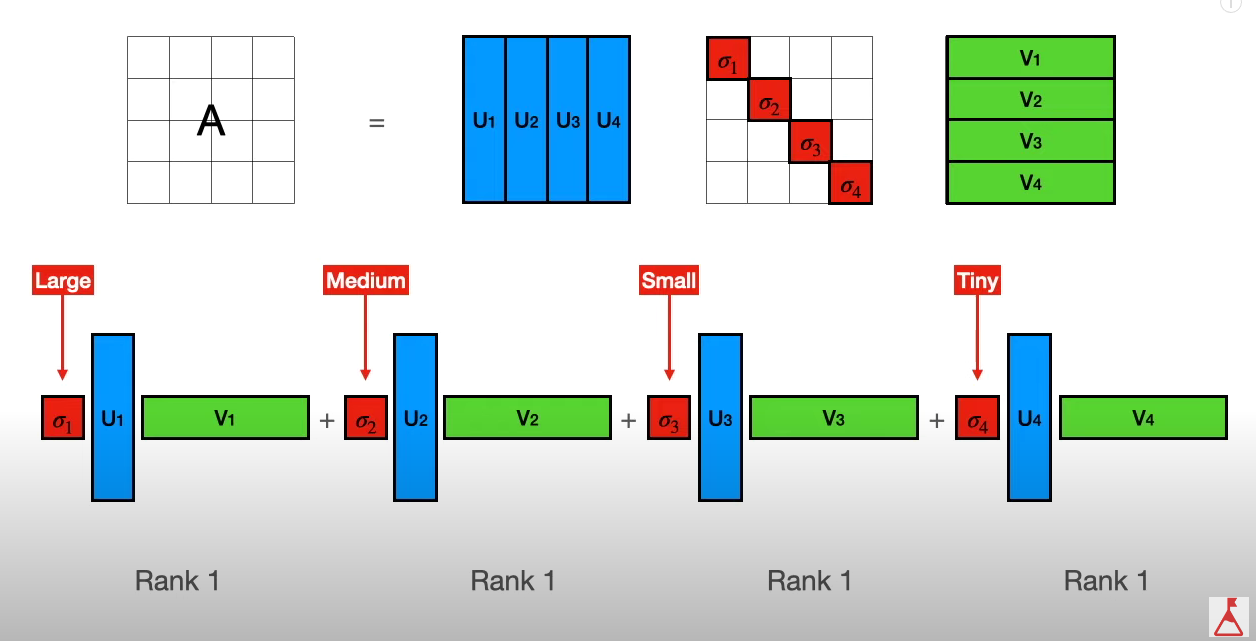

### SVD from scratch
Reference:
* https://jeremykun.com/2016/05/16/singular-value-decomposition-part-2-theorem-proof-algorithm/
* https://www.youtube.com/watch?v=WmDnaoY2Ivs
Singular Value Decomposition (SVD): Dominant Correlations- Steve Brunton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import normalvariate
from math import sqrt

In [2]:
def random_unit_vector(m):
    unnormalized = np.array([normalvariate(mu=0, sigma=1) for _ in range(m)])
    norm_ = np.linalg.norm(unnormalized)
    return np.array([item/norm_ for item in unnormalized])


def svd_1d(X, eps=1e-10):    
    n, m = X.shape
    start_v = random_unit_vector(m)   # start with random unit vector
    prev_eigenvector = None
    curr_eigenvector = start_v
    gram_matrix = X.T @ X    # this is essentially correlation matrix among the columns of X
                             # i.e the inner product between 2 columns of X: xi.T xj = <xi, xj>
 
    # power iteration until converges
    iters = 0        
    while True:
        iters += 1
        prev_eigenvector = curr_eigenvector
        curr_eigenvector = np.dot(gram_matrix, prev_eigenvector)
        curr_eigenvector = curr_eigenvector / np.linalg.norm(curr_eigenvector)
 
        if abs(np.dot(curr_eigenvector, prev_eigenvector)) > (1 - eps):
            print('Converged in {} iterations'.format(iters))
            return curr_eigenvector

        
def svd(X, k=None, eps=1e-10):
    '''
        Compute the singular value decomposition of a matrix X using the power method. 
        X is the input matrix
        k is the number of singular values you wish to compute
        If k is None, this computes the full-rank decomposition
    '''
    X = np.array(X, dtype=float)
    n, m = X.shape
    svd_so_far = []
    if k is None:
        k = min(n, m)
 
    for i in range(k):
        matrix_for1D = X.copy()
 
        for singular_val, u, v in svd_so_far[:i]:
            matrix_for1D -= singular_val * np.outer(u, v)
        
        if n > m:
            v = svd_1d(matrix_for1D, eps=eps)        # next singular vector
            u_unnormalized = np.dot(X, v)
            sigma = np.linalg.norm(u_unnormalized)   # next singular value
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrix_for1D, eps=eps)        # next singular vector
            v_unnormalized = np.dot(X.T, u) 
            sigma = np.linalg.norm(v_unnormalized)   # next singular value  
            v = v_unnormalized / sigma
 
        svd_so_far.append((sigma, u, v))
     
    singular_values, us, vs = [np.array(x) for x in zip(*svd_so_far)]
 
    return singular_values, us, vs          

In [4]:
# Users-Movies data
data = np.array([[1,1,1,0,0],
                 [3,3,3,0,0],
                 [4,4,4,0,0],
                 [5,5,5,0,0],
                 [0,2,0,4,4],
                 [0,0,0,5,5],
                 [0,1,0,2,2]])

df = pd.DataFrame(data, columns=['Matrix', 'Alien', 'Serenity', 'Casablance', 'Amelie'],
                 index=['User_1', 'User_2', 'User_3', 'User_4', 'User_5', 'User_6', 'User_7'])

df

,Matrix,Alien,Serenity,Casablance,Amelie
User_1,1,1,1,0,0
User_2,3,3,3,0,0
User_3,4,4,4,0,0
User_4,5,5,5,0,0
User_5,0,2,0,4,4
User_6,0,0,0,5,5
User_7,0,1,0,2,2


In [5]:
S, U, VT = svd(df)

Converged in 24 iterations
Converged in 4 iterations
Converged in 2 iterations
Converged in 6 iterations
Converged in 2 iterations


In [6]:
S

array([12.48101469,  9.50861406,  1.34555971,  1.45631152,  1.45631152])

In [8]:
U[:, :2]

array([[-0.13759885, -0.41279656],
       [-0.0236142 , -0.0708426 ],
       [ 0.01080851,  0.03242554],
       [-0.06350845, -0.19052535],
       [-0.06350845, -0.19052535]])

In [9]:
VT[:2]

array([[-0.56225648, -0.59286034, -0.56225648, -0.09014412, -0.09014412],
       [-0.12664984,  0.02876136, -0.12664984,  0.69537487,  0.69537487]])

### Singular Value Decomposition (SVD) and Image Compression
https://www.youtube.com/watch?v=DG7YTlGnCEo

https://github.com/luisguiserrano/singular_value_decomposition/blob/master/image_compression.ipynb

In [10]:
plt.rcParams['figure.figsize'] = (5, 3)

In [6]:
A = np.array([[3, 0], [4, 5]])

In [4]:
np.linalg.svd(A)   # A = U Sigma VT  => rotation - scaling - rotation

(array([[-0.31622777, -0.9486833 ],
        [-0.9486833 ,  0.31622777]]),
 array([6.70820393, 2.23606798]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [32]:
vmin = 0
vmax = 1
image_bias = 1

def plot_svd(A):
    n = len(A)
    plt.imshow(image_bias - A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    U, S, V = svd(A)
    
    imgs = []
    for i in range(n):
        imgs.append(S[i] * np.outer(U[:, i], V[i]))
    
    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
    
    # plot each image component
    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for i, ax in enumerate(axes):
        ax.imshow(image_bias - imgs[i], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[i], 2), fontsize=30)
    plt.show()
    
    # plot the combined image components
    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for i, ax in enumerate(axes):
        ax.imshow(image_bias - combined_imgs[i], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    
    return U, S, V

In [8]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])

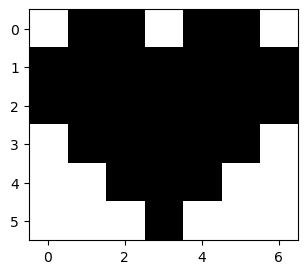

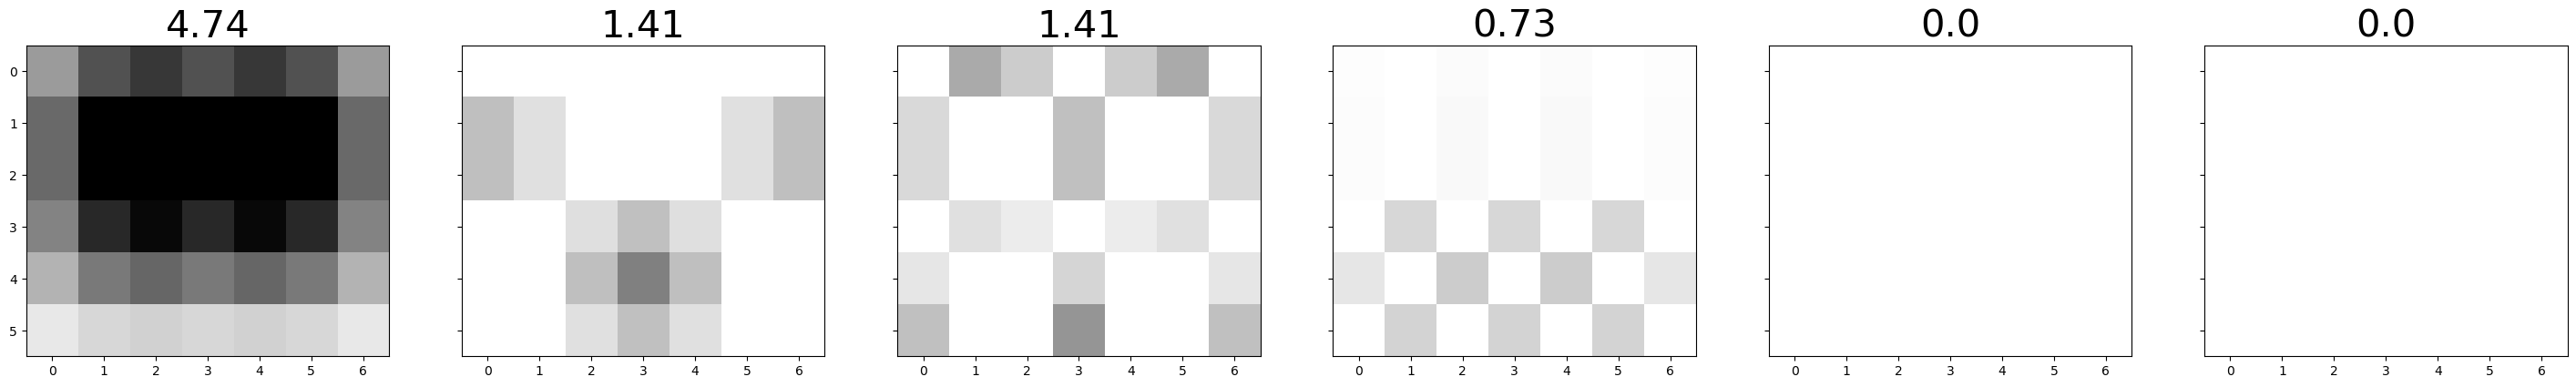

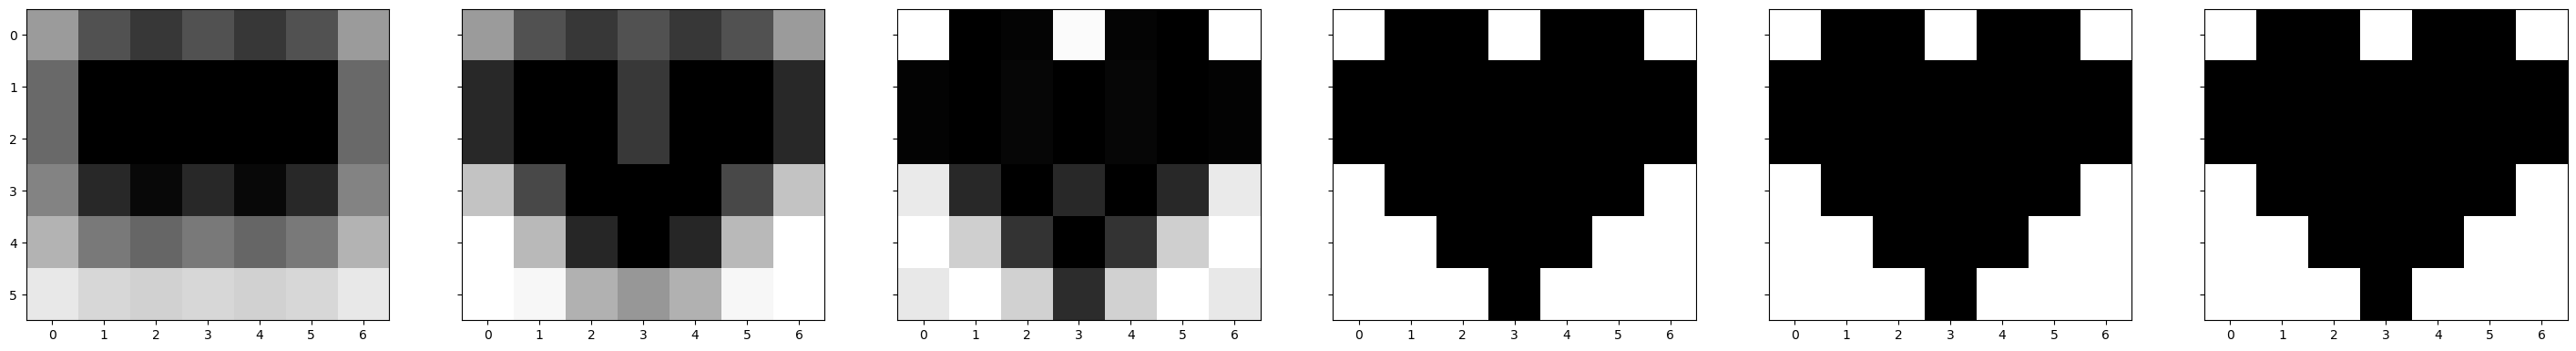

In [33]:
U, S, V = plot_svd(D)

In [34]:
print(np.round(U, 2))

[[-0.36  0.   -0.73 -0.05  0.33  0.48]
 [-0.54 -0.35  0.27 -0.08 -0.58  0.4 ]
 [-0.54 -0.35  0.27 -0.08  0.58 -0.4 ]
 [-0.45  0.35 -0.27  0.52 -0.33 -0.48]
 [-0.28  0.71  0.18 -0.62 -0.   -0.  ]
 [-0.08  0.35  0.46  0.57  0.33  0.48]]


In [35]:
S

array([4.73981604e+00, 1.41421356e+00, 1.41421356e+00, 7.30851490e-01,
       1.98794690e-16, 8.04765960e-17])

In [36]:
sigma = np.diag(S)
print(np.round(sigma, 2))

[[4.74 0.   0.   0.   0.   0.  ]
 [0.   1.41 0.   0.   0.   0.  ]
 [0.   0.   1.41 0.   0.   0.  ]
 [0.   0.   0.   0.73 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


In [37]:
print(np.round(V, 2))

[[-0.23 -0.4  -0.46 -0.4  -0.46 -0.4  -0.23]
 [-0.5  -0.25  0.25  0.5   0.25 -0.25 -0.5 ]
 [ 0.39 -0.32 -0.19  0.65 -0.19 -0.32  0.39]
 [-0.22  0.42 -0.44  0.42 -0.44  0.42 -0.22]
 [ 0.55 -0.44  0.09  0.   -0.09  0.44 -0.55]
 [-0.4  -0.55 -0.2  -0.    0.2   0.55  0.4 ]
 [ 0.2   0.1  -0.67  0.    0.67 -0.1  -0.2 ]]


In [13]:
def plot(A, n=100):
    # create unit circle with 100 points
    x = np.array([[np.cos(2 * np.pi * i / n),
                   np.sin(2 * np.pi * i / n)] for i in range(n)])
    y = np.dot(A, x.T).T
    for i in range(n):
        plt.scatter(y[i, 0], y[i, 1], color=[(n-i)/n, 0, i/n])

In [14]:
plt.rcParams['figure.figsize'] = (4, 4)

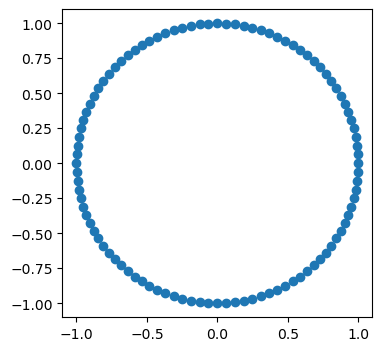

In [81]:
# plot x variable in plot()
n = 100
x = np.array([[np.cos(2 * np.pi * i / n),
                   np.sin(2 * np.pi * i / n)] for i in range(n)])
plt.scatter(x[:, 0], x[:, 1]);

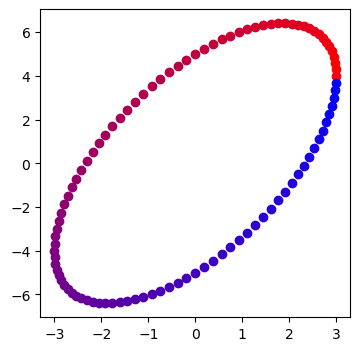

In [15]:
# A: transformation matrix
A = np.array([[3, 0], [4, 5]]) 
plot(A)

In [80]:
# # plot a circle
# plt.figure(figsize=(4, 4))
# t = np.linspace(0, np.pi * 2, 100)
# col=[[(n-i)/n, 0, i/n] for i in range(n)]
# plt.scatter(np.cos(t), np.sin(t), color=col);

In [12]:
def plot_circles(A, xlim=4, ylim=4, n=100):
    U, S, V = svd(A)
    sigma = np.diag(S)
    I = np.identity(len(A))
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(I, n)
    plt.title('Unit Circle')
    plt.show()
    
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(V, n)
    print('Rotating', np.arccos(V[0][0]), 'or', -np.arccos(V[0][0]) * 180 / np.pi, 'degree')
    print(np.round(V, 2))
    plt.title('VT')
    plt.show()
    
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(np.dot(sigma, V), n)
    plt.title('Sigma VT')
    print(np.round(sigma, 2))
    print('Stretching x-axis by', np.round(S[0], 2))
    print('Stretching y-axis by', np.round(S[1], 2))
    plt.show()
    
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(np.dot(np.dot(U, sigma), V), n)
    print('Rotating', -np.arccos(U[0][0]), 'or', -np.arccos(U[0][0]) * 180 / np.pi, 'degrees')
    plt.title('U Sigma VT')
    print(np.round(U, 2))
    plt.show()
    
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(A, n)
    print('Original Transformation')
    plt.title('A')
    print(np.round(A, 2))
    
    return U, S, V

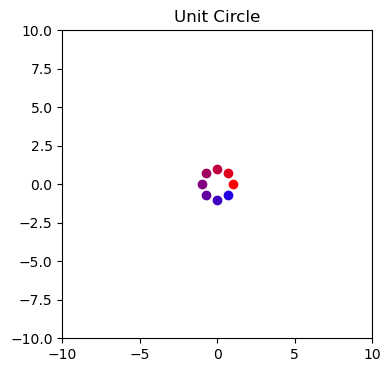

Rotating 2.356194490192345 or -135.0 degree
[[-0.71 -0.71]
 [-0.71  0.71]]


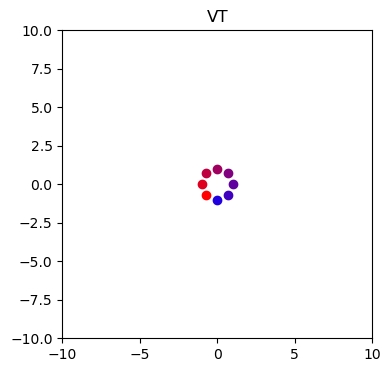

[[6.71 0.  ]
 [0.   2.24]]
Stretching x-axis by 6.71
Stretching y-axis by 2.24


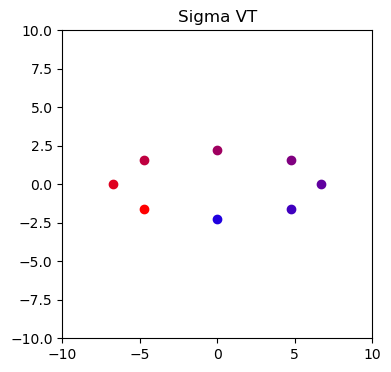

Rotating -1.892546881191539 or -108.43494882292202 degrees
[[-0.32 -0.95]
 [-0.95  0.32]]


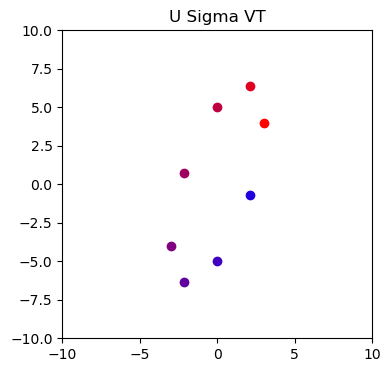

Original Transformation
[[3 0]
 [4 5]]


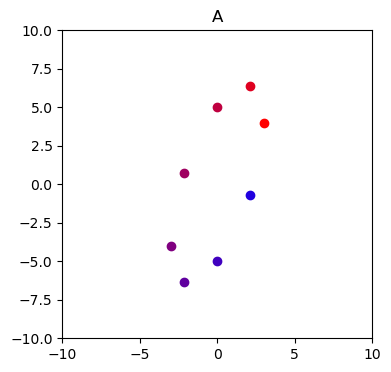

In [89]:
U, S, V = plot_circles(A, xlim=10, ylim=10, n=8)

In [92]:
-U

array([[ 0.31622777,  0.9486833 ],
       [ 0.9486833 , -0.31622777]])

In [94]:
np.diag(S)

array([[6.70820393, 0.        ],
       [0.        , 2.23606798]])

In [95]:
-V

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

### Degenerate transformation

First sigma value => horizontal scaling

Second sigma value => vertical scaling

What if we make the second sigma value zero

In [18]:
A = np.array([[1.5, 1.5], [4.5, 4.5]])     # degenerate matrix - Rank 1
A

array([[1.5, 1.5],
       [4.5, 4.5]])

In [25]:
U, S, VT = np.linalg.svd(A)

In [27]:
# Second sigma value is basically zero (6.28036983e-16)
np.diag(S)

array([[6.70820393e+00, 0.00000000e+00],
       [0.00000000e+00, 6.28036983e-16]])

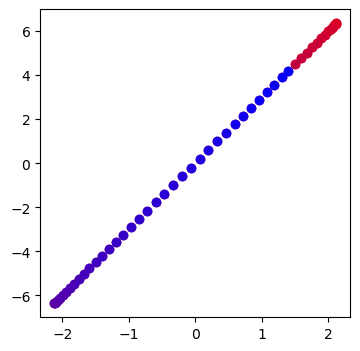

In [19]:
plot(A)

### SVD - example: Users-to-Movies

https://www.youtube.com/watch?v=P5mlg91as1c

Lecture 47 — Singular Value Decomposition | Stanford University - Artificial Intelligence - All in One

In [6]:
import pandas as pd
import numpy as np
from numpy.linalg import svd

In [11]:
data = np.array([[1,1,1,0,0],
                 [3,3,3,0,0],
                 [4,4,4,0,0],
                 [5,5,5,0,0],
                 [0,2,0,4,4],
                 [0,0,0,5,5],
                 [0,1,0,2,2]])

In [8]:
df = pd.DataFrame(data, columns=['Matrix', 'Alien', 'Serenity', 'Casablance', 'Amelie'],
                 index=['User_1', 'User_2', 'User_3', 'User_4', 'User_5', 'User_6', 'User_7'])

In [9]:
df

,Matrix,Alien,Serenity,Casablance,Amelie
User_1,1,1,1,0,0
User_2,3,3,3,0,0
User_3,4,4,4,0,0
User_4,5,5,5,0,0
User_5,0,2,0,4,4
User_6,0,0,0,5,5
User_7,0,1,0,2,2


In [36]:
U, S, VT = svd(data)

In [37]:
# take the first 3 singular values since the 4th one is really small (3.04642685e-16)
sigma = np.diag(S)
np.round(sigma[:3, :3], 2)

array([[12.48,  0.  ,  0.  ],
       [ 0.  ,  9.51,  0.  ],
       [ 0.  ,  0.  ,  1.35]])

In [38]:
# U is 'user-to-concept' similarity matrix
np.round(-U[:, :3], 2)

array([[ 0.14, -0.02,  0.01],
       [ 0.41, -0.07,  0.03],
       [ 0.55, -0.09,  0.04],
       [ 0.69, -0.12,  0.05],
       [ 0.15,  0.59, -0.65],
       [ 0.07,  0.73,  0.68],
       [ 0.08,  0.3 , -0.33]])

### U is 'user-to-concept' similarity matrix
We can think of column of U as concepts, ex:
* 1st column corresponds to SciFi concept (Matrix, Alien, Serenity)
* 2nd column corresponds to Romance concept (Casablanca, Amelie)

Rows of U correponds to Users. 
* User_2, User_3, User_4 like SciFi
* User_5, User_6 like Romance

### Sigma is the 'strength' of each concept
The strength of SciFi concept (12.48) is higher than the strength of the Romance concept (9.51)

In [40]:
np.round(sigma[:3, :3], 2)

array([[12.48,  0.  ,  0.  ],
       [ 0.  ,  9.51,  0.  ],
       [ 0.  ,  0.  ,  1.35]])

### V is 'movie-to-concept' similarity matrix
* First row of V corresponds to Scifi concept, and the first 3 columns of V correspond to Matrix, Alien, Serenity
* Second row of V correesponds to Romance concept and the last 2 columns of V correspond to Casablanca, Alien

In [39]:
np.round(-VT[:3], 2)

array([[ 0.56,  0.59,  0.56,  0.09,  0.09],
       [-0.13,  0.03, -0.13,  0.7 ,  0.7 ],
       [ 0.41, -0.8 ,  0.41,  0.09,  0.09]])

The third concept has very low strength, we can kind of 'ignore' it, it just models in some sense the noise in our data.